# Exploratory Data Analysis: ROI for Budget

While we've seen that movie revenue has been increasing over time, movies are also more expensive to make now than they used to be. With the advent of CGI and greenscreen technology, blockbuster budgets have also increased exponentially. Let's see how that affects a movie's earning potential.

### Libraries to import:

In [1]:
import pandas as pd
import seaborn as sns
sns.set_palette("muted")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Concatenate Scraped Movie Data by Decade:

Let's start by creating a dataframe consisting of webscraped data from IMDB for the top 300 movies from each year going back to 1960. We will concatenate each decade's csv file into one. 

In [3]:
sixties = pd.read_csv('../zippedData/1960_1970.csv')

In [4]:
seventies = pd.read_csv('../zippedData/1971_1980.csv')

In [5]:
eighties = pd.read_csv('../zippedData/1981_1990.csv')

In [6]:
nineties = pd.read_csv('../zippedData/1991_2000.csv')

In [7]:
aughts = pd.read_csv('../zippedData/2001_2010.csv')

In [8]:
teens = pd.read_csv('../zippedData/2011_2020.csv')

In [9]:
combined = sixties.append([seventies, eighties, nineties, aughts, teens])
combined

,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
0,https://www.imdb.com/title/tt0054215/,Psycho,1960,"['Horror', 'Mystery', 'Thriller']","$32,000,000","$806,947","$32,000,000",NaN,8.5,"580,863"
1,https://www.imdb.com/title/tt0054047/,The Magnificent Seven,1960,"['Action', 'Adventure', 'Western']",NaN,"$2,000,000",NaN,NaN,7.7,"85,315"
2,https://www.imdb.com/title/tt0054331/,Spartacus,1960,"['Adventure', 'Biography', 'Drama', 'History',...","$1,830,650","$12,000,000","$1,836,351",NaN,7.9,"120,895"
3,https://www.imdb.com/title/tt0053604/,The Apartment,1960,"['Comedy', 'Drama', 'Romance']",NaN,"$3,000,000","$177,066",NaN,8.3,"157,134"
4,https://www.imdb.com/title/tt0053917/,Home from the Hill,1960,"['Drama', 'Romance']",NaN,"$1,818,688",NaN,NaN,7.4,"2,864"
...,...,...,...,...,...,...,...,...,...,...
2995,https://www.imdb.com/title/tt7541720/,Music,2020,['Drama'],NaN,NaN,NaN,PG-13,NaN,NaN
2996,https://www.imdb.com/title/tt5867314/,The Empty Man,2020,"['Crime', 'Drama', 'Horror', 'Mystery', 'Thril...",NaN,NaN,NaN,R,NaN,NaN
2997,https://www.imdb.com/title/tt5714470/,Come Away,2020,"['Adventure', 'Drama', 'Fantasy']",NaN,NaN,NaN,NaN,6.6,27
2998,https://www.imdb.com/title/tt6559576/,Selfie Dad,2020,"['Comedy', 'Family']",NaN,NaN,NaN,PG,3.7,83


### Examine DataFrame and Preliminary Cleaning:

18,000 entries, not bad.

In [10]:
combined.shape

(18300, 10)

In [11]:
combined.columns

Index(['url', 'title', 'year', 'genre', 'gross_usa', 'budget',
       'worldwide_gross', 'pg_rated', 'rating', 'rating_pop'],
      dtype='object')

Because we are combining multiple dataframes they will have shared indexes. So let's reset the index and remove the old column this will create.

In [12]:
combined.reset_index(inplace=True)

In [13]:
combined = combined.drop('index', axis=1)

In [14]:
combined

,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
0,https://www.imdb.com/title/tt0054215/,Psycho,1960,"['Horror', 'Mystery', 'Thriller']","$32,000,000","$806,947","$32,000,000",NaN,8.5,"580,863"
1,https://www.imdb.com/title/tt0054047/,The Magnificent Seven,1960,"['Action', 'Adventure', 'Western']",NaN,"$2,000,000",NaN,NaN,7.7,"85,315"
2,https://www.imdb.com/title/tt0054331/,Spartacus,1960,"['Adventure', 'Biography', 'Drama', 'History',...","$1,830,650","$12,000,000","$1,836,351",NaN,7.9,"120,895"
3,https://www.imdb.com/title/tt0053604/,The Apartment,1960,"['Comedy', 'Drama', 'Romance']",NaN,"$3,000,000","$177,066",NaN,8.3,"157,134"
4,https://www.imdb.com/title/tt0053917/,Home from the Hill,1960,"['Drama', 'Romance']",NaN,"$1,818,688",NaN,NaN,7.4,"2,864"
...,...,...,...,...,...,...,...,...,...,...
18295,https://www.imdb.com/title/tt7541720/,Music,2020,['Drama'],NaN,NaN,NaN,PG-13,NaN,NaN
18296,https://www.imdb.com/title/tt5867314/,The Empty Man,2020,"['Crime', 'Drama', 'Horror', 'Mystery', 'Thril...",NaN,NaN,NaN,R,NaN,NaN
18297,https://www.imdb.com/title/tt5714470/,Come Away,2020,"['Adventure', 'Drama', 'Fantasy']",NaN,NaN,NaN,NaN,6.6,27
18298,https://www.imdb.com/title/tt6559576/,Selfie Dad,2020,"['Comedy', 'Family']",NaN,NaN,NaN,PG,3.7,83


### Data Cleaning:

#### Check for Missing Values:

In [15]:
combined.isnull().sum()

url                    0
title                  0
year                   0
genre                  5
gross_usa           8893
budget              9547
worldwide_gross     8212
pg_rated           11061
rating               117
rating_pop           117
dtype: int64

#### Remove Dollar Signs and Commas from Currency Columns:

In [16]:
combined['worldwide_gross'] = combined['worldwide_gross'].str.strip('$')
combined['worldwide_gross'] = combined['worldwide_gross'].str.replace(',', '')

combined['budget'] = combined['budget'].str.strip('$')
combined['budget'] = combined['budget'].str.replace(',', '')

combined['gross_usa'] = combined['gross_usa'].str.strip('$')
combined['gross_usa'] = combined['gross_usa'].str.replace(',', '')

#### Remove Non-USD Reported Earnings:

We removed entries with non-USD reported budgets. This removed about 600 entries of the 18,000. Note that this does not remove all foreign films, just films produced by companies who did not report their budget in USD.

In [17]:
combined = combined[~combined['budget'].astype(str).str.startswith('SEK')] # Format is redefine the column with all
combined = combined[~combined['budget'].astype(str).str.startswith('NOK')] # entries EXCEPT where the entry starts
combined = combined[~combined['budget'].astype(str).str.startswith('KRW')] # with the specified currency string.
combined = combined[~combined['budget'].astype(str).str.startswith('SGD')]
combined = combined[~combined['budget'].astype(str).str.startswith('THB')]
combined = combined[~combined['budget'].astype(str).str.startswith('JPY')]
combined = combined[~combined['budget'].astype(str).str.startswith('HUF')]
combined = combined[~combined['budget'].astype(str).str.startswith('INR')]
combined = combined[~combined['budget'].astype(str).str.startswith('GBP')]
combined = combined[~combined['budget'].astype(str).str.startswith('HKD')]
combined = combined[~combined['budget'].astype(str).str.startswith('FRF')]
combined = combined[~combined['budget'].astype(str).str.startswith('EUR')]
combined = combined[~combined['budget'].astype(str).str.startswith('FIM')]
combined = combined[~combined['budget'].astype(str).str.startswith('DEM')]
combined = combined[~combined['budget'].astype(str).str.startswith('DKK')]
combined = combined[~combined['budget'].astype(str).str.startswith('CAD')]
combined = combined[~combined['budget'].astype(str).str.startswith('ESP')]
combined = combined[~combined['budget'].astype(str).str.startswith('AUD')]
combined = combined[~combined['budget'].astype(str).str.startswith('BEF')]
combined = combined[~combined['budget'].astype(str).str.startswith('CNY')]
combined = combined[~combined['budget'].astype(str).str.startswith('ATS')]
combined = combined[~combined['budget'].astype(str).str.startswith('BRL')]

In [18]:
combined

,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
0,https://www.imdb.com/title/tt0054215/,Psycho,1960,"['Horror', 'Mystery', 'Thriller']",32000000,806947,32000000,NaN,8.5,"580,863"
1,https://www.imdb.com/title/tt0054047/,The Magnificent Seven,1960,"['Action', 'Adventure', 'Western']",NaN,2000000,NaN,NaN,7.7,"85,315"
2,https://www.imdb.com/title/tt0054331/,Spartacus,1960,"['Adventure', 'Biography', 'Drama', 'History',...",1830650,12000000,1836351,NaN,7.9,"120,895"
3,https://www.imdb.com/title/tt0053604/,The Apartment,1960,"['Comedy', 'Drama', 'Romance']",NaN,3000000,177066,NaN,8.3,"157,134"
4,https://www.imdb.com/title/tt0053917/,Home from the Hill,1960,"['Drama', 'Romance']",NaN,1818688,NaN,NaN,7.4,"2,864"
...,...,...,...,...,...,...,...,...,...,...
18295,https://www.imdb.com/title/tt7541720/,Music,2020,['Drama'],NaN,NaN,NaN,PG-13,NaN,NaN
18296,https://www.imdb.com/title/tt5867314/,The Empty Man,2020,"['Crime', 'Drama', 'Horror', 'Mystery', 'Thril...",NaN,NaN,NaN,R,NaN,NaN
18297,https://www.imdb.com/title/tt5714470/,Come Away,2020,"['Adventure', 'Drama', 'Fantasy']",NaN,NaN,NaN,NaN,6.6,27
18298,https://www.imdb.com/title/tt6559576/,Selfie Dad,2020,"['Comedy', 'Family']",NaN,NaN,NaN,PG,3.7,83


#### Remove Rows with Missing Data: 

We need intact budget and worldwide gross earnings for each movie so we need to remove rows with missing values in these columns. This will decrease the size of the dataframe, but, in this case, it is necessary. 

In [19]:
pared_down = combined.dropna() #Now we can drop missing values.
pared_down

,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
1202,https://www.imdb.com/title/tt0057012/,Dr. Strangelove or: How I Learned to Stop Worr...,1964,['Comedy'],9440272,1800000,9443876,PG,8.4,"437,986"
1205,https://www.imdb.com/title/tt0058461/,A Fistful of Dollars,1964,"['Action', 'Drama', 'Western']",14500000,200000,14516248,R,8.0,"190,339"
1238,https://www.imdb.com/title/tt0057877/,Becket,1964,"['Biography', 'Drama', 'History']",149327,3000000,149327,PG-13,7.8,"13,272"
1502,https://www.imdb.com/title/tt0059113/,Doctor Zhivago,1965,"['Drama', 'Romance', 'War']",111721910,11000000,111918564,PG-13,8.0,"67,790"
1558,https://www.imdb.com/title/tt0059418/,Major Dundee,1965,"['Adventure', 'War', 'Western']",20807,3800000,20807,PG-13,6.7,"6,864"
...,...,...,...,...,...,...,...,...,...,...
18099,https://www.imdb.com/title/tt9173418/,Brahms: The Boy II,2020,"['Drama', 'Horror', 'Mystery', 'Thriller']",12611536,10000000,20311536,PG-13,4.6,"7,432"
18127,https://www.imdb.com/title/tt7545266/,Like a Boss,2020,['Comedy'],22169514,29000000,29753143,R,4.4,"6,756"
18130,https://www.imdb.com/title/tt7510346/,The Turning,2020,"['Drama', 'Horror', 'Mystery']",15472775,14000000,18592707,PG-13,3.8,"6,813"
18136,https://www.imdb.com/title/tt9208444/,Impractical Jokers: The Movie,2020,['Comedy'],10691091,3000000,10691091,PG-13,6.0,"3,694"


#### Recast Budget and Worldwide Gross as Int64: 

This throws a warning because we are altering a copy of a dataframe. In this case, it is what we want so don't mind the warning, the change will go through.

In [20]:
pared_down['budget'] = pared_down.budget.astype('int64') # Recast as numerical data type.

/Users/arencarpenter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
pared_down['worldwide_gross'] = pared_down.worldwide_gross.astype('int64')

/Users/arencarpenter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Confirm that the data type of both columns is now int64.

In [22]:
pared_down.budget.dtype

dtype('int64')

In [23]:
pared_down.worldwide_gross.dtype

dtype('int64')

Let's sort the values to get a sense of our range of budgets.

In [24]:
pared_down.budget.sort_values()

11436         6000
9672          7000
13262         7000
10425        15000
14150        15000
           ...    
17111    300000000
14113    300000000
17122    317000000
17401    321000000
17706    356000000
Name: budget, Length: 4616, dtype: int64

### Data Visualization:

Now we can start to visualize. Let's plot each movie's budget and worldwide revenue.

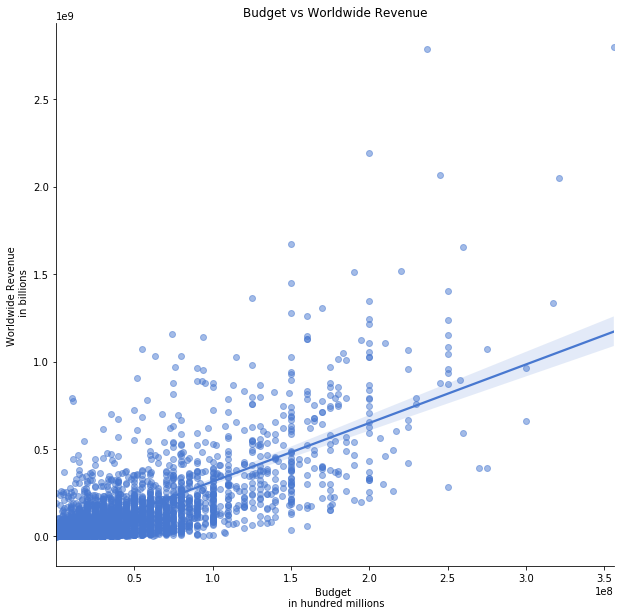

In [38]:
plt.figure(figsize=(10, 10))
sns.regplot(x = 'budget', y = 'worldwide_gross', data = pared_down, scatter_kws={'alpha':0.5})
plt.title('Budget vs Worldwide Revenue')          # Set title.
plt.xlabel("Budget \n in hundred millions")       # Set x-axis label.
plt.ylabel('Worldwide Revenue \n in billions')    # Set y-axis label.
sns.despine()

As we can see, there is a positive relationship between budget and revenue. Using our regression line, we would expect a film with budget of 150,000,000 -- or 150 million -- to return 500,000,000 -- or 0.5 billion -- in revenue. Thus a profit of 350,000,000. 

Here is the same scatter plot as a regplot for the distribution of each variable. As we can see, most movies have a budget of less than 50,000,000 and earn less than 100,000,000. 

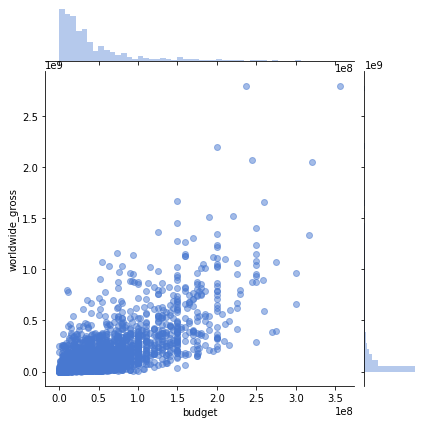

In [261]:
sns.jointplot(x = 'budget', y = 'worldwide_gross', data = pared_down, alpha = 0.5)

### Insights:

The average movie has a positive return on investment for its budget. Devoid of other factors, producers should put in as much money as they can to ensure the biggest payoff. However, this does not account for other important factors, such as release time, user and critic ratings, and competition from other films.